In [40]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [41]:
link = 'https://drive.google.com/file/d/1Fv9eaCGWb0Mdwr9p_xS1mZIH2U5Gti8X/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv') 
 
df = pd.read_csv('xclara.csv')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

In [42]:
# Transforming object date columns to datetime columns
df[['ClosedDate', 'Error']] = df['ClosedDate'].str.split(' ', expand=True)
df["ClosedDate"] = df["ClosedDate"].apply(pd.to_datetime)
df.drop('Error',axis=1,inplace=True)
df[['ListingCreationDate', 'Error']] = df['ListingCreationDate'].str.split(' ', expand=True)
df["ListingCreationDate"] = df["ListingCreationDate"].apply(pd.to_datetime)
df.drop('Error',axis=1,inplace=True)
df[['DateCreditPulled', 'Error']] = df['DateCreditPulled'].str.split(' ', expand=True)
df["DateCreditPulled"] = df["DateCreditPulled"].apply(pd.to_datetime)
df.drop('Error',axis=1,inplace=True)
df[['LoanOriginationDate', 'Error']] = df['LoanOriginationDate'].str.split(' ', expand=True)
df["LoanOriginationDate"] = df["LoanOriginationDate"].apply(pd.to_datetime)
df.drop('Error',axis=1,inplace=True)
df[['FirstRecordedCreditLine', 'Error']] = df['FirstRecordedCreditLine'].str.split(' ', expand=True)
df["FirstRecordedCreditLine"] = df["FirstRecordedCreditLine"].apply(pd.to_datetime)
df.drop('Error',axis=1,inplace=True)

In [43]:
#Creating a sub dataframe from relevant data starting from 2009 after the global crisis accrording to listing creation date
df.sort_values(by=['ListingCreationDate'],inplace=True)
sub_df=df.loc[df['ListingCreationDate'] >= '2009-01-01']
sub_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
102795,5A7C3450423298556233B3C,415054,2009-04-28,D,36,Completed,2011-07-18,0.37453,0.3500,0.3400,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,49
97545,532034516025331845B3905,415123,2009-04-28,C,36,Completed,2011-07-01,0.18021,0.1480,0.1380,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,47
17774,5EF4345058093044810D28F,415116,2009-04-28,B,36,Completed,2010-09-15,0.19846,0.1615,0.1515,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,27
528,3BBA345088754410516372A,415089,2009-04-28,NaN,36,Completed,2010-11-04,0.17170,0.1500,0.1400,...,-39.43,0.0,0.0,0.0,0.0,1.0,0,0,0.0,220
102440,606B3451484423777A60DE2,415070,2009-04-28,C,36,Completed,2012-05-07,0.26292,0.2400,0.2300,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,47


In [49]:
#Checking for missing values
pd.set_option('display.max_rows',None)
sub_df.isna().sum()

ListingNumber                              0
ListingCreationDate                        0
Term                                       0
LoanStatus                                 0
ClosedDate                                 0
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                    0
EstimatedLoss                              0
EstimatedReturn                            0
ProsperRating (numeric)                    0
ProsperScore                               0
ListingCategory (numeric)                  0
Occupation                              1333
EmploymentStatus                           0
EmploymentStatusDuration                   0
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
DateCreditPulled                           0
CreditScoreRangeLower                      0
CreditScoreRangeUpper                      0
FirstRecor

In [ ]:
#Filling missing values for ClosedDate
sub_df["ClosedDate"].fillna("9999-99-99", inplace=True)
# Dropping unecessary columns
sub_df.drop(columns=['ListingKey', 'GroupKey','LoanKey','MemberKey'], inplace=True)
sub_df.drop('LoanOriginationQuarter', axis=1,inplace=True)
sub_df.drop('CreditGrade',axis=1,inplace=True)
sub_df.drop('ProsperRating (Alpha)',axis=1,inplace=True)
sub_df.drop('BorrowerState',axis=1,inplace=True)
sub_df.drop('Occupation',axis=1,inplace=True)
# Dealing with columns with values applicable only after 2009
non_applicable_cols = ['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore']
sub_df[non_applicable_cols] = sub_df[non_applicable_cols].fillna(0)
sub_df['EmploymentStatusDuration'] = sub_df['EmploymentStatusDuration'].fillna(sub_df['EmploymentStatusDuration'].median())
# df.dropna('DebtToIncomeRatio',axis=1, inplace=True)
sub_df.dropna(subset=['DebtToIncomeRatio'],inplace=True)

In [ ]:
#Dealing with columns that has a lot of missing values
null_cols = ['TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
       'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber',
       'TotalProsperLoans']
sub_df[null_cols] = sub_df[null_cols].fillna(0)

In [67]:
sub_df.isna().sum()

ListingNumber                          0
ListingCreationDate                    0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
DateCreditPulled                       0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
FirstRecordedCreditLine                0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLines

In [ ]:
#Encoding categorical Features
#Encoding the Occupation column with Base N Encoding
!pip install  category_encoders
import category_encoders as ce
encoder= ce.BaseNEncoder(cols=['Occupation'],return_df=True,base=5)
#Fit and Transform Data
sub_df_encoded=encoder.fit_transform(sub_df)
#Encoding the EmploymentStatus column with Base N Encoding
encoder_2= ce.BaseNEncoder(cols=['EmploymentStatus'],return_df=True,base=5)
#Fit and Transform Data
sub_df_encoded=encoder_2.fit_transform(sub_df_encoded)


In [62]:
#Encoding the LoanStatus column and renaming it to be the target column
sub_df_encoded['LoanStatus'] = sub_df_encoded['LoanStatus'].replace(['Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)'],1)
sub_df_encoded['LoanStatus'] = sub_df_encoded['LoanStatus'].replace(['Current','Chargedoff','Defaulted','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)'],0)
sub_df_encoded['LoanStatus'].value_counts()
sub_df_encoded.rename(columns = {'LoanStatus':'target'}, inplace = True)

In [63]:
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X= sub_df_encoded.drop(columns=['ListingCreationDate', 'DateCreditPulled','FirstRecordedCreditLine','IncomeRange','LoanOriginationDate','target','IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable','ClosedDate'])
y = sub_df_encoded['target']

clf = ExtraTreesClassifier()
clf.fit(X, y)
print(clf.feature_importances_)


[0.06170419 0.03473571 0.00774459 0.00822396 0.00806444 0.0101738
 0.00634902 0.00908063 0.00533645 0.00699864 0.00481361 0.00295725
 0.00392788 0.00396623 0.00388634 0.01767083 0.00434843 0.00446421
 0.00502365 0.00404406 0.00406351 0.00425631 0.00408921 0.0043409
 0.00394896 0.00453606 0.00261856 0.00230549 0.00321927 0.00272135
 0.00039306 0.00425938 0.0046966  0.0041789  0.00429112 0.00414558
 0.00381946 0.00428377 0.00423131 0.00265023 0.00256757 0.0029218
 0.00142234 0.00036162 0.00244212 0.00220103 0.00263419 0.03670422
 0.02263956 0.11238764 0.08255001 0.03047502 0.01791409 0.09933728
 0.16203233 0.04115665 0.05047168 0.00637266 0.01158867 0.01314406
 0.00123709 0.00095847 0.0006366  0.00041694 0.00030325 0.00856017]


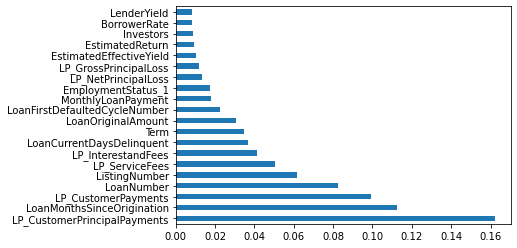

In [64]:
feat_importances = pd.Series(clf.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show();